## Dataset Cultivos Agrícolas en Colombia según municipios y departamentos

### 0. Cargue de Librerias

In [83]:
#!pip install requests
#!pip install matplotlib
#!pip install scikit-learn


     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ---------------------------------------- 60.6/60.6 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
    --------------------------------------- 0.2/10.6 MB 2.0 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/10.6 MB 4.2 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/10.6 MB 5.4 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/10.6 MB 6.1 MB/s eta 0:00:02
   ------- -------------------------------- 2.0/10.6 MB 6.9 MB/s eta 0:00:02
   -------- ------------------------------- 2.2/10.6 MB 7.3 MB/s eta 0:00:02
   --------- ------------------------------ 2.4/10.6 MB 6.5 MB/s eta 0:00:02
   ----------- ---------------------------- 3.0/10.6 MB 7.0 MB/s eta 0:00:02
   ------------ ---

In [28]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io

### 1. Importar Datos

In [100]:


# URL base de la API
url_base = 'https://www.datos.gov.co/resource/2pnw-mmge.csv'

# Parámetros para la solicitud inicial sin consulta SQL compleja
params = {
    '$limit': 1000,  # Número de registros por página
    '$offset': 0     # Desplazamiento inicial
}

# Lista para almacenar los DataFrames de cada página
dataframes = []

while True:
    # Realizar la solicitud HTTP
    response = requests.get(url_base, params=params)
    
    if response.status_code != 200:
        print(f"Error en la solicitud: {response.status_code}")
        break

    # Leer el contenido CSV en un DataFrame
    df = pd.read_csv(io.StringIO(response.text))
    
    # Verificar si el DataFrame está vacío (no más datos)
    if df.empty:
        break
    
    # Añadir el DataFrame a la lista
    dataframes.append(df)
    
    # Incrementar el offset para la siguiente página
    params['$offset'] += params['$limit']

# Concatenar todos los DataFrames en uno solo
if dataframes:
    data = pd.concat(dataframes, ignore_index=True)
    # Mostrar las primeras filas del DataFrame combinado
    print(data.head())
else:
    print("No se recuperaron datos.")


   c_d_dep        departamento  c_d_mun   municipio grupo_de_cultivo  \
0       15              BOYACA    15114    BUSBANZA       HORTALIZAS   
1       25        CUNDINAMARCA    25754      SOACHA       HORTALIZAS   
2       25        CUNDINAMARCA    25214        COTA       HORTALIZAS   
3       54  NORTE DE SANTANDER    54405  LOS PATIOS       HORTALIZAS   
4       54  NORTE DE SANTANDER    54518    PAMPLONA       HORTALIZAS   

  subgrupo_de_cultivo cultivo desagregaci_n_regional_y   a_o periodo  \
0              ACELGA  ACELGA                   ACELGA  2006   2006B   
1              ACELGA  ACELGA                   ACELGA  2006   2006B   
2              ACELGA  ACELGA                   ACELGA  2006   2006B   
3              ACELGA  ACELGA                   ACELGA  2006   2006B   
4              ACELGA  ACELGA                   ACELGA  2006   2006B   

   rea_sembrada_ha  rea_cosechada_ha  producci_n_t  rendimiento_t_ha  \
0                2                 1             1            

In [46]:
print("Primeras filas del DataFrame:")
data.head()

Primeras filas del DataFrame:


,c_d_dep,departamento,c_d_mun,municipio,grupo_de_cultivo,subgrupo_de_cultivo,cultivo,desagregaci_n_regional_y,a_o,periodo,rea_sembrada_ha,rea_cosechada_ha,producci_n_t,rendimiento_t_ha,estado_fisico_produccion,nombre_cientifico,ciclo_de_cultivo
0,15,BOYACA,15114,BUSBANZA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,1,1,1.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
1,25,CUNDINAMARCA,25754,SOACHA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,82,80,1440,18.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
2,25,CUNDINAMARCA,25214,COTA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,2,26,17.33,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
3,54,NORTE DE SANTANDER,54405,LOS PATIOS,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,3,3,48,16.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
4,54,NORTE DE SANTANDER,54518,PAMPLONA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,1,1,5,10.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO


In [37]:
data.shape

(206068, 17)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206068 entries, 0 to 206067
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   c_d_dep                   206068 non-null  int64  
 1   departamento              206068 non-null  object 
 2   c_d_mun                   206068 non-null  int64  
 3   municipio                 206067 non-null  object 
 4   grupo_de_cultivo          206068 non-null  object 
 5   subgrupo_de_cultivo       206068 non-null  object 
 6   cultivo                   206068 non-null  object 
 7   desagregaci_n_regional_y  206068 non-null  object 
 8   a_o                       206068 non-null  int64  
 9   periodo                   206068 non-null  object 
 10  rea_sembrada_ha           206068 non-null  int64  
 11  rea_cosechada_ha          206068 non-null  int64  
 12  producci_n_t              206068 non-null  int64  
 13  rendimiento_t_ha          202635 non-null  f

In [39]:
# Verificar valores nulos en el DataFrame
print("\nValores nulos en el DataFrame:")
print(data.isnull().sum())


Valores nulos en el DataFrame:
c_d_dep                        0
departamento                   0
c_d_mun                        0
municipio                      1
grupo_de_cultivo               0
subgrupo_de_cultivo            0
cultivo                        0
desagregaci_n_regional_y       0
a_o                            0
periodo                        0
rea_sembrada_ha                0
rea_cosechada_ha               0
producci_n_t                   0
rendimiento_t_ha            3433
estado_fisico_produccion       0
nombre_cientifico           2857
ciclo_de_cultivo               0
dtype: int64


In [40]:
# Estadísticas descriptivas para columnas numéricas
print("\nEstadísticas descriptivas para columnas numéricas:")
data.describe()


Estadísticas descriptivas para columnas numéricas:


,c_d_dep,c_d_mun,a_o,rea_sembrada_ha,rea_cosechada_ha,producci_n_t,rendimiento_t_ha
count,206068.000000,206068.000000,206068.000000,206068.000000,206068.000000,2.060680e+05,202635.000000
mean,40.322563,40747.534066,2012.455976,291.073825,249.419522,2.790726e+03,9.238820
std,25.278662,25256.621906,3.479113,1153.602556,980.375226,4.511471e+04,14.888659
min,5.000000,5001.000000,2006.000000,0.000000,0.000000,0.000000e+00,0.030000
25%,17.000000,17524.000000,2009.000000,10.000000,8.000000,3.200000e+01,1.500000
50%,41.000000,41357.000000,2013.000000,35.000000,30.000000,1.400000e+02,5.000000
75%,68.000000,68001.000000,2015.000000,151.000000,130.000000,6.480000e+02,11.230000
max,99.000000,99773.000000,2018.000000,47403.000000,38600.000000,4.546116e+06,246.000000


In [41]:
# Estadísticas descriptivas para columnas categóricas
print("\nEstadísticas descriptivas para columnas categóricas:")
data.describe(include=['object'])


Estadísticas descriptivas para columnas categóricas:


,departamento,municipio,grupo_de_cultivo,subgrupo_de_cultivo,cultivo,desagregaci_n_regional_y,periodo,estado_fisico_produccion,nombre_cientifico,ciclo_de_cultivo
count,206068,206067,206068,206068,206068,206068,206068,206068,203211,206068
unique,32,1018,13,120,223,271,48,23,214,3
top,BOYACA,BOLIVAR,FRUTALES,MAIZ,MAIZ,MAIZ TRADICIONAL,2013,FRUTO FRESCO,ZEA MAYS,TRANSITORIO
freq,20576,1012,50236,24965,24965,20069,5608,59682,25199,108943


### 2. Análisis Exploratorio de Datos (EDA)

In [88]:
# Selecciona solo las columnas categóricas
columnas_categoricas = data.select_dtypes(include=['object'])

# Itera sobre las columnas categóricas y muestra los valores únicos
for columna in columnas_categoricas:
    print(f"Valores únicos en '{columna}': {data[columna].unique()}")

Valores únicos en 'departamento': ['BOYACA' 'CUNDINAMARCA' 'NORTE DE SANTANDER' 'SANTANDER' 'CAUCA'
 'VALLE DEL CAUCA' 'CALDAS' 'PUTUMAYO' 'TOLIMA' 'NARIÑO' 'QUINDIO'
 'ANTIOQUIA' 'CAQUETA' 'AMAZONAS' 'CHOCO' 'HUILA' 'ARAUCA' 'CASANARE'
 'LA GUAJIRA' 'BOLIVAR' 'CESAR' 'META' 'RISARALDA' 'SUCRE' 'CORDOBA'
 'VICHADA' 'MAGDALENA' 'GUAINIA' 'ATLANTICO' 'SAN ANDRES Y PROVIDENCIA'
 'GUAVIARE' 'VAUPES']
Valores únicos en 'municipio': ['BUSBANZA' 'SOACHA' 'COTA' ... 'CACAHUAL' 'SAN FELIPE' 'MORICHAL']
Valores únicos en 'grupo_de_cultivo': ['HORTALIZAS' 'PLANTAS AROMATICAS, CONDIMENTARIAS Y MEDICINALES'
 'TUBERCULOS Y PLATANOS' 'FRUTALES' 'OLEAGINOSAS' 'LEGUMINOSAS' 'FIBRAS'
 'FLORES Y FOLLAJES' 'CEREALES' 'OTROS PERMANENTES' 'FORESTALES' 'HONGOS'
 'OTROS TRANSITORIOS']
Valores únicos en 'subgrupo_de_cultivo': ['ACELGA' 'PLANTAS MEDICINALES' 'MALANGA' 'ACHIRA'
 'PLANTAS CONDIMENTARIAS' 'FRUTALES EXOTICOS' 'AGUACATE' 'AJI' 'AHUYAMA'
 'AJO' 'AJONJOLI' 'PLANTAS AROMATICAS' 'ALFALFA' 'ALCACHOFA' 'A

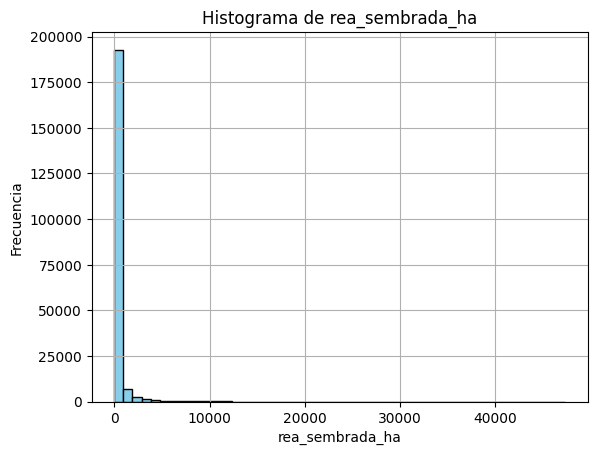

In [43]:
plt.hist(data['rea_sembrada_ha'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histograma de rea_sembrada_ha')
plt.xlabel('rea_sembrada_ha')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

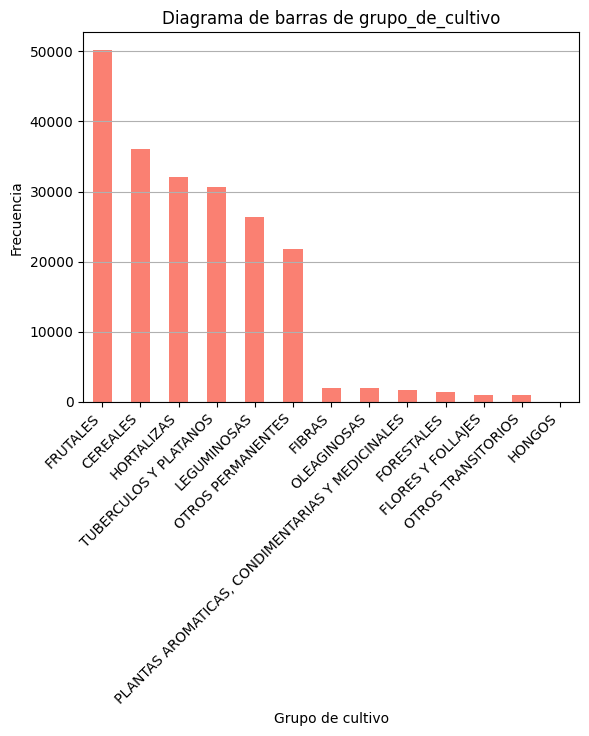

In [44]:
data['grupo_de_cultivo'].value_counts().plot(kind='bar', color='salmon')
plt.title('Diagrama de barras de grupo_de_cultivo')
plt.xlabel('Grupo de cultivo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

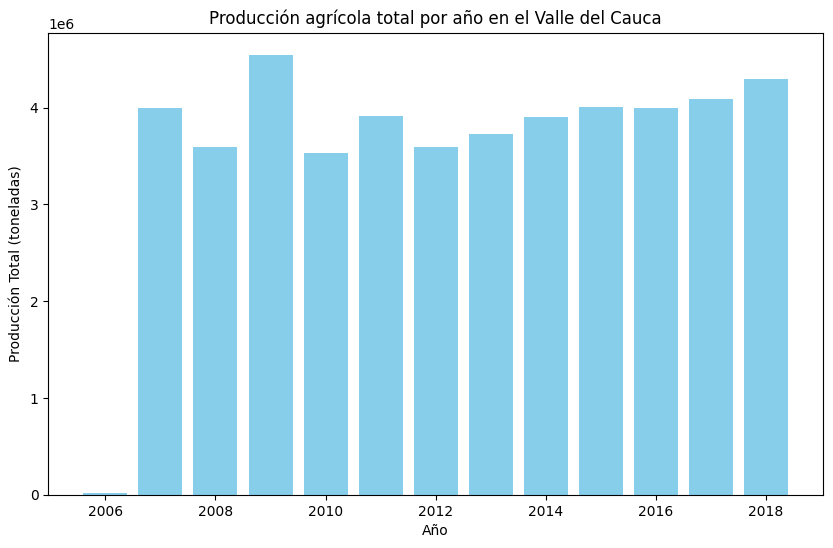

In [94]:
# Filtrar datos para el Departamento del Valle del Cauca
valle_del_cauca_data = data[data['departamento'] == 'VALLE DEL CAUCA']

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Graficar la producción agrícola total por año usando un gráfico de barras
plt.bar(valle_del_cauca_data['a_o'], valle_del_cauca_data['producci_n_t'], color='skyblue')

# título y etiquetas de los ejes
plt.title('Producción agrícola total por año en el Valle del Cauca')
plt.xlabel('Año')
plt.ylabel('Producción Total (toneladas)')
plt.show()

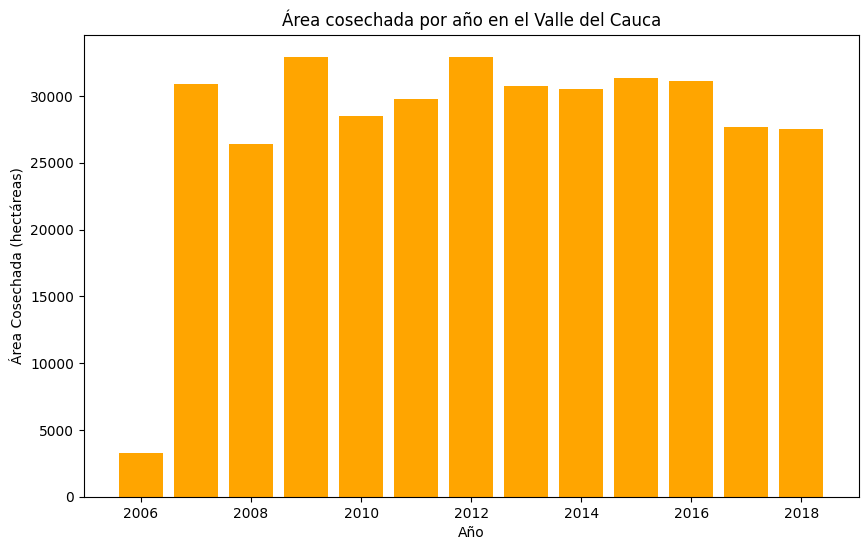

In [96]:
# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Graficar el área cosechada por año usando un gráfico de barras
plt.bar(valle_del_cauca_data['a_o'], valle_del_cauca_data['rea_cosechada_ha'], color='orange')

# Añadir título y etiquetas de los ejes
plt.title('Área cosechada por año en el Valle del Cauca')
plt.xlabel('Año')
plt.ylabel('Área Cosechada (hectáreas)')

# Mostrar la gráfica
plt.show()

In [103]:
# Guardar el DataFrame en un archivo Excel
data.to_excel('datos_agricolas_2007_2018.xlsx', index=False)

In [ ]:
#### data